In [1]:
reset()
%display latex

# Binárias Compactas no regime pós Newtoniano

Os cálculos realizados neste notebook seguem os passos presentes no cap. 4.1.2 do livro [Gravitational-Wave Physics and Astronomy](https://www.amazon.com.br/Gravitational-Wave-Physics-Astronomy-Introduction-Experiment-ebook/dp/B07M5MMYKN).

In [2]:
var('c G m m1 m2 M mu eta t r R iota varphi')
# c - veloc. da luz
# G - const. gravitacional
# m1 - massa do corpo 1
# m2 - massa do corpo 2
# M = m1 + m2 - massa total do sist.
# mu = m1*m2/M - massa reduzida
# eta = mu/M - razão de massa simétrica
# r = |x - y| - distância binaŕia-Terra
# R = raio orbital - l0
# t - tempo
# iota - ângulo normal à orbita
# varphi - parâmetro da fase orbital

(c, G, m, m1, m2, M, mu, eta, t, r, R, iota, varphi)

In [3]:
msol = var('msol', latex_name = r'M_\odot') # massa do sol
dm = var('dm', latex_name=r'\delta m')      # dm = m1 - m2 - delta das massas

## parâmetros

In [4]:
import scipy.constants as const

In [5]:
parametros_1 = {G:const.G, c:const.speed_of_light, msol:1.99*10^(30), r:1.5*10^(20), R:0.19*10^(10)}
parametros_2 = {m1:1.441*msol,m2:1.387*msol}
parametros_s = {eta : mu/M, dm : m1 - m2}
parametros_m = {M : m1 + m2, mu : (m1*m2)/(m1+m2)}

In [6]:
parametros_1

{G: 6.6743e-11,
 c: 299792458.0,
 msol: 1.99000000000000e30,
 r: 1.50000000000000e20,
 R: 1.90000000000000e9}

### Expansão pós Newtoniana até a ordem $\mathcal{O}(\epsilon^2)$

O método utilizado na construção das perturbações será o $\textit{Taylor T3}$, esse método utiliza expansão em série de potências para a construção das funções que darão a frequência obital definida por $x(t)$ e a fase orbital $\varphi(t)$ no tempo $t$.  Isso é feito em termos de uma variável de tempo adimensional substituta $\Theta$, primeiro precisaremos das contantes de tempo $t_c$ e fase orbital $\varphi_c$ de coalescência da binária, respectivamente:

In [7]:
tc = var(r't_c')
phic = var(r'phic', latex_name=r'\varphi_c')

Definindo os parâmetros:

In [8]:
var('Theta')
Theta_f = Theta == (eta/5)*c^3*(tc - t)/(G*M)
Theta_f

Theta == -1/5*c^3*eta*(t - t_c)/(G*M)

In [9]:
x_f = x == ((Theta^(-1/4))/4*(1 + (743/4032 + (11/48)*eta)*(Theta)^(-1/4))).full_simplify() # Taylor T3
x_f

x == 1/16128*(924*eta + 4032*Theta^(1/4) + 743)/sqrt(Theta)

In [10]:
varphi_f = varphi == (phic - (1/eta)*Theta^((5/8))*(1 + (3715/8064 + 55*eta/96)*Theta^(-1/4))).full_simplify() # Taylor T3
varphi_f

varphi == -1/8064*(5*Theta^(5/8)*(924*eta + 743) - 8064*(eta*phic - Theta^(5/8))*Theta^(1/4))/(Theta^(1/4)*eta)

As formas de onda $h_+$ e $h_{\times}$ para um observador localizado na posição $(r, \iota, \phi)$ em coordenadas polares relativa ao sistema de coordendas pode ser escrito em termo dos coeficientes pós newtonianos como função de $(\iota, \varphi)$, expressos por:

In [11]:
H0_plus = -(1 + (cos(iota)^2))*cos(2*varphi)
H0_plus

-(cos(iota)^2 + 1)*cos(2*varphi)

In [12]:
H12_plus = -(dm/(8*M))*sin(iota)*((5 + (cos(iota))^2)*cos(varphi) - 9*(1 + (cos(iota))^2)*cos(3*varphi))
H12_plus

1/8*(9*(cos(iota)^2 + 1)*cos(3*varphi) - (cos(iota)^2 + 5)*cos(varphi))*dm*sin(iota)/M

In [13]:
H1_plus = (1/6)*((19 + 9*(cos(iota))^2 - 2*(cos(iota))^4) - eta*(19 - 11*(cos(iota))^2 - 6*(cos(iota))^4))*cos(2*varphi) - (4/3)*(sin(iota))^2*(1 + (cos(iota))^2)*(1 - 3*eta)*cos(4*varphi)
H1_plus

4/3*(cos(iota)^2 + 1)*(3*eta - 1)*cos(4*varphi)*sin(iota)^2 - 1/6*(2*cos(iota)^4 - (6*cos(iota)^4 + 11*cos(iota)^2 - 19)*eta - 9*cos(iota)^2 - 19)*cos(2*varphi)

In [14]:
H0_cross = -2*cos(iota)*sin(2*varphi)
H0_cross

-2*cos(iota)*sin(2*varphi)

In [15]:
H12_cross = -(3*dm/(4*M))*sin(iota)*cos(iota)*(sin(varphi) - 3*sin(3*varphi))
H12_cross

3/4*dm*(3*sin(3*varphi) - sin(varphi))*cos(iota)*sin(iota)/M

In [16]:
H1_cross = (1/3)*cos(iota)*((17 - 4*cos(iota)) - eta*(13 - 12*(cos(iota))^2))*sin(2*varphi) - (8/3)*cos(iota)*(sin(iota))^2*(1 - 3*eta)*sin(4*varphi)
H1_cross

8/3*(3*eta - 1)*cos(iota)*sin(iota)^2*sin(4*varphi) + 1/3*((12*cos(iota)^2 - 13)*eta - 4*cos(iota) + 17)*cos(iota)*sin(2*varphi)

Definindo a amplitude - forma de onda - $h_+(t)$:

In [17]:
h_plus = (2*G*mu/(c^2*r))*x*(H0_plus + x^(1/2)*H12_plus + x*H1_plus)
h_plus

1/12*(3*(9*(cos(iota)^2 + 1)*cos(3*varphi) - (cos(iota)^2 + 5)*cos(varphi))*dm*sqrt(x)*sin(iota)/M + 4*(8*(cos(iota)^2 + 1)*(3*eta - 1)*cos(4*varphi)*sin(iota)^2 - (2*cos(iota)^4 - (6*cos(iota)^4 + 11*cos(iota)^2 - 19)*eta - 9*cos(iota)^2 - 19)*cos(2*varphi))*x - 24*(cos(iota)^2 + 1)*cos(2*varphi))*G*mu*x/(c^2*r)

In [18]:
h_plus_para = h_plus.subs(varphi_f,x_f).subs(Theta_f, phic == 0).subs(parametros_s).subs(parametros_m)
h_plus_para = h_plus_para.subs(parametros_2)

In [19]:
h_plus_para = h_plus_para.subs(parametros_1)

Posição $\iota = \pi/2$, onde a polarização $h_+$ será máxima:

In [20]:
h_plus_para.subs({iota : pi/2, tc : 100})

-(1.50080330958962e-25)*sqrt(1/5)*(8.82550039767054*sqrt(5)*sqrt(1/7)*sqrt(sqrt(1/5)*(2198.34616466801*(1/5)^(1/4)*(-202863.217224624*t + 2.02863217224624e7)^(1/4) + 973.915775064069)/sqrt(-202863.217224624*t + 2.02863217224624e7))*(5*cos(-0.00455053330171205*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4)) - 9*cos(-0.0136515999051362*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4))) - 16.8197250081278*sqrt(1/5)*(2198.34616466801*(1/5)^(1/4)*(-202863.217224624*t + 2.02863217224624e7)^(1/4) + 973.915775064069)*(14.2517318980332*cos(-0.00910106660342411*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4)) - 2.00218766067352*cos(-0.0182021332068482*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4)))/sqrt(-202863.217224624*t + 2.02863217224624e7) + 96768*cos(-0.00910106660342411*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4)))*(2198.34616466801*(1/5)^(1/4)*(-202863.217224624*t + 2.02863217224624e7)^(1/4) + 973.915775064069)/sqrt(-202863.217224624*t + 2.02863217224624e7)

Plotando a amplitude $h_+$ no intervalo $(0 \le t < t_c)$:

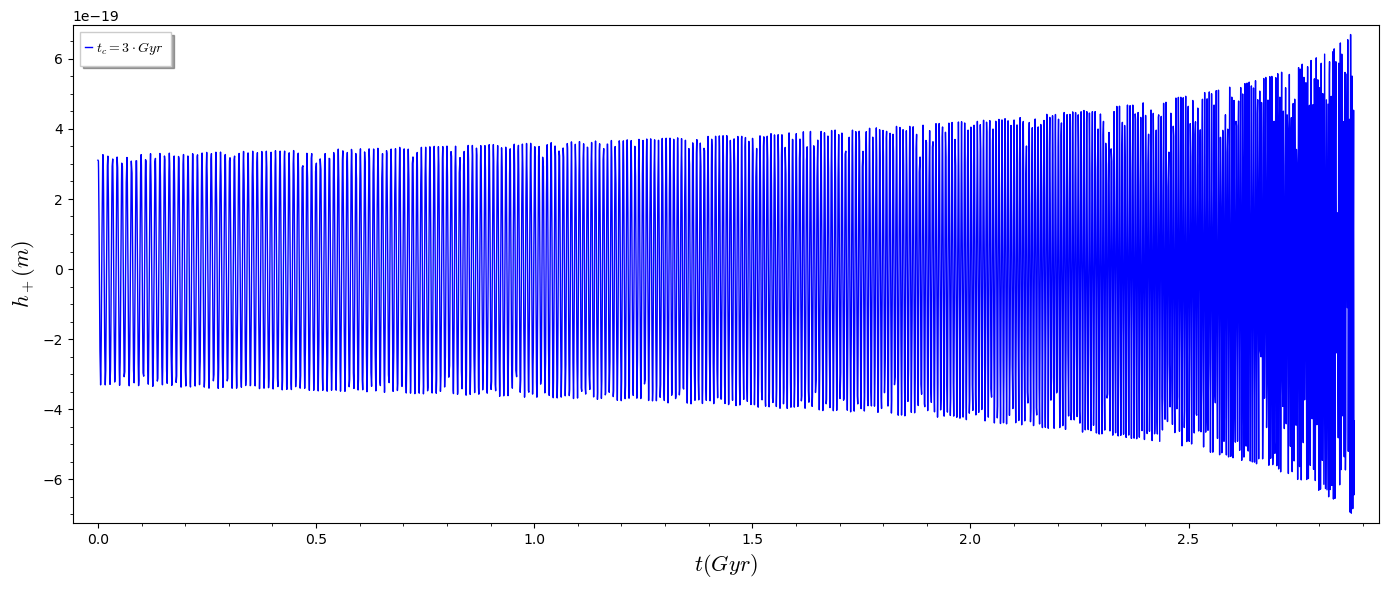

In [21]:
plot(h_plus_para.subs({iota : pi/2, tc : 3}),(t,0,2.88),plot_points=3000,
                 frame = True, axes = False,axes_labels=[r'$t(Gyr)$', r'$h_+(m)$'], 
                 legend_label=r'$t_c= 3 \cdot Gyr$', figsize=[14,6])

Plotanto essas perturbações em tempos de coalescência diferentes, respectivamente, $0.05$, $0.17$, $0.29$ e $0.41$:

In [22]:
g = [plot(h_plus_para.subs({iota : pi/2}, {tc : k}),(t,0,(k-0.02)),plot_points=3000, 
          frame = True, axes = False, color=hue(k/10), alpha=.6, axes_labels=[r'$t(Gyr)$', r'$h_{+}(m)$'], 
          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(4, 17, 4)]

In [23]:
g_array = graphics_array([[g[0],g[1]],[g[2], g[3]]])

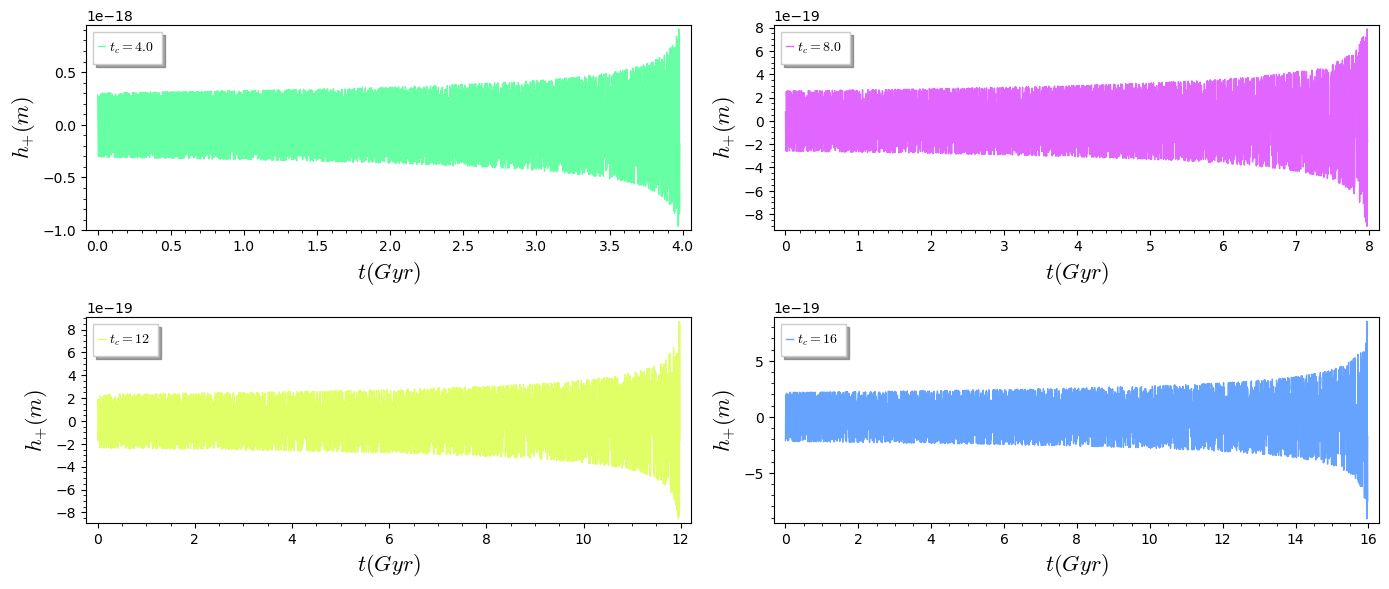

In [24]:
g_array.show(figsize = [14, 6])

In [25]:
#(g_array).save('h+_array_pos_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

In [26]:
#g2 = [plot(h_plus_para.subs({iota : pi/2}, {tc : k}),(t,0,k),plot_points=1000, 
#          frame = False, axes = True, color=hue(k*10), alpha=.6, axes_labels=[r'$t$', r'$h_{+}(m)$'], 
#          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(0.05, 0.5, 0.12)]

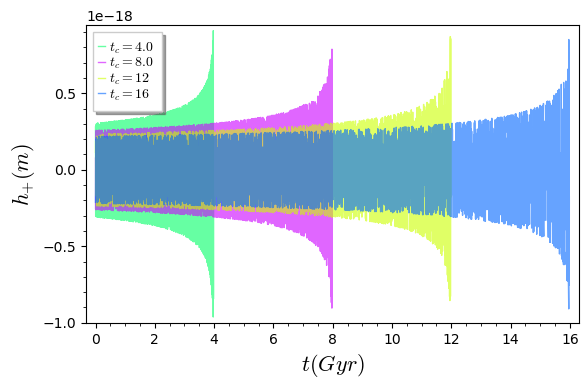

In [27]:
(g[0]+ g[1] + g[2] + g[3]).set_legend_options(loc = 'best')
sum(g)

In [28]:
#(sum(g)).save('h+_pos_newt.pdf', gridlines=False, title='Expansão pós Newtoniana - $O(\\epsilon^2)$', frame=True, axes=False)

Definindo a amplitude - forma de onda - $h_{\times}(t)$:

In [29]:
h_cross(t) = (2*G*mu/(c^2*r))*x*(H0_cross + x^(1/2)*H12_cross + x*H1_cross)
h_cross

t |--> 1/6*(9*dm*sqrt(x)*(3*sin(3*varphi) - sin(varphi))*cos(iota)*sin(iota)/M + 4*(8*(3*eta - 1)*cos(iota)*sin(iota)^2*sin(4*varphi) + ((12*cos(iota)^2 - 13)*eta - 4*cos(iota) + 17)*cos(iota)*sin(2*varphi))*x - 24*cos(iota)*sin(2*varphi))*G*mu*x/(c^2*r)

In [30]:
h_cross_para = h_cross.subs(varphi_f,x_f).subs(Theta_f, phic == 0).subs(parametros_s).subs(parametros_m)
h_cross_para = h_cross_para.subs(parametros_2)

In [31]:
h_cross_para = h_cross_para.subs(parametros_1)

Posição $\iota = 0$, onde a polarização $h_{\times}$ será máxima:

In [32]:
h_cross_para.subs({iota : 0, tc : 100})

t |--> -(3.00160661917924e-25)*sqrt(1/5)*(-214.453027014086*sqrt(1/5)*(2198.34616466801*(1/5)^(1/4)*(-202863.217224624*t + 2.02863217224624e7)^(1/4) + 973.915775064069)*sin(-0.00910106660342411*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4))/sqrt(-202863.217224624*t + 2.02863217224624e7) + 96768*sin(-0.00910106660342411*(1/5)^(3/4)*(965.083670515158*(1/5)^(7/8)*(-202863.217224624*t + 2.02863217224624e7)^(7/8) + 1068.88331109740*(1/5)^(5/8)*(-202863.217224624*t + 2.02863217224624e7)^(5/8))/(-202863.217224624*t + 2.02863217224624e7)^(1/4)))*(2198.34616466801*(1/5)^(1/4)*(-202863.217224624*t + 2.02863217224624e7)^(1/4) + 973.915775064069)/sqrt(-202863.217224624*t + 2.02863217224624e7)

PLotando a amplitude $h_{\times}$ no intervalo $(0 \le t < t_c)$:

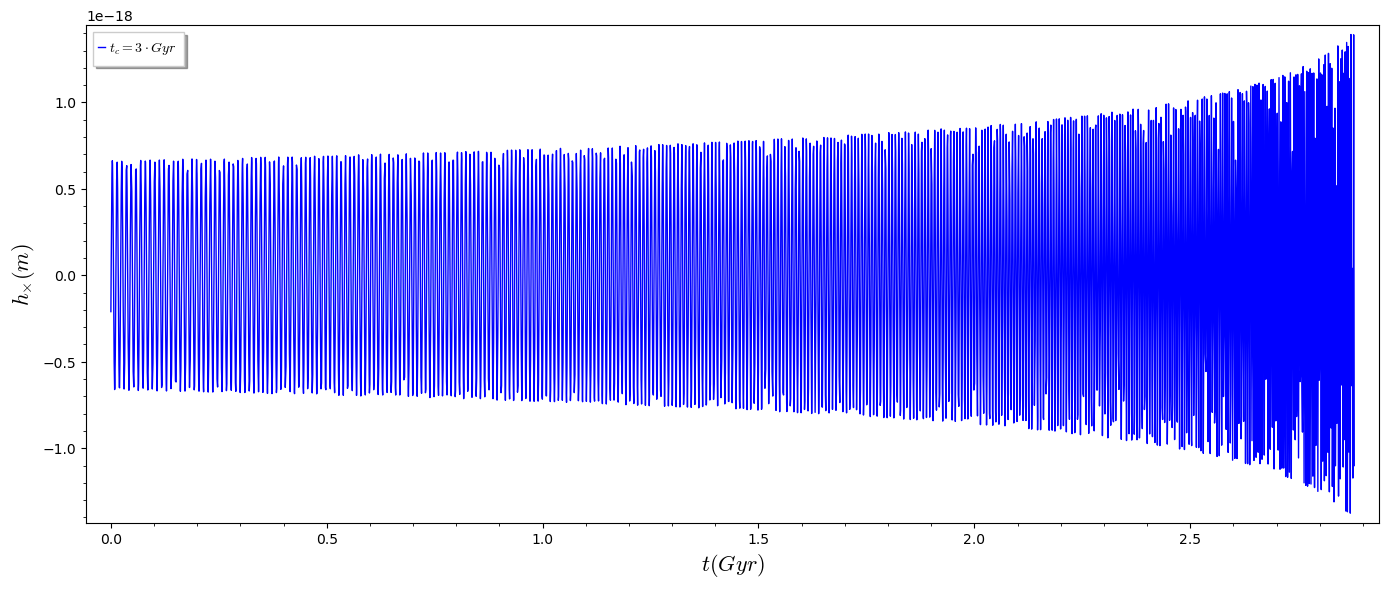

In [33]:
plot(h_cross_para.subs({iota: 0, tc:3}),(t,0, 2.88),plot_points=3000, 
                frame = True, axes = False, axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'], 
                 legend_label=r'$t_c= 3 \cdot Gyr$', figsize=[14,6])

Plotanto essas perturbações em tempos de coalescência diferentes, respectivamente, $0.05$, $0.17$, $0.29$ e $0.41$:

In [34]:
f = [plot(h_cross_para.subs({iota : 0}, {tc : k}),(t,0,(k-0.02)), plot_points=3000, 
          frame = True, axes = False, color=hue(k/10),alpha=.6, axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'],
          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(4, 17, 4)]

In [35]:
f_array = graphics_array([[f[0],f[1]],[f[2], f[3]]])

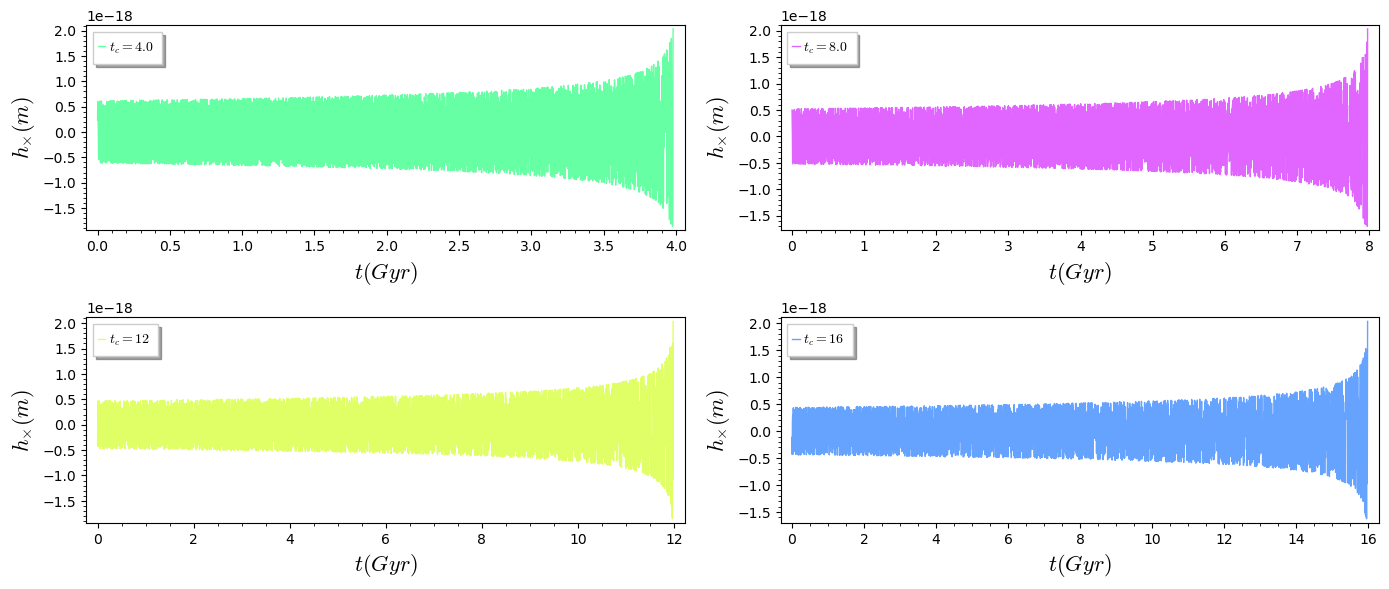

In [36]:
f_array.show(figsize = [14, 6])

In [37]:
#(f_array).save('hx_array_pos_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

In [38]:
#f2 = [plot(h_cross_para.subs({iota : 0}, {tc : k}),(t,0,k), plot_points=1000, 
#          frame = False, axes = True, color=hue(k*10),alpha=.6, axes_labels=[r'$t$', r'$h_{\times}(m)$'], 
#          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(0.05, 0.5, 0.12)]

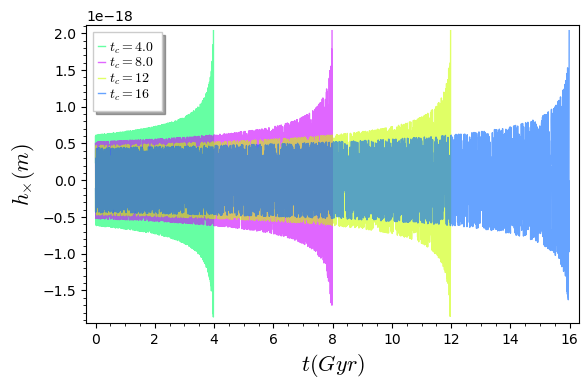

In [39]:
(f[0] + f[1] + f[2] + f[3]).set_legend_options(loc = 'best')
sum(f)

In [40]:
#(sum(f)).save('hx_pos_newt.pdf', gridlines=False, title='Expansão pós Newtoniana - $O(\\epsilon^2)$', frame=True, axes=False)